# Checking spectrum of perturbed matrix 

We start with M-1 gaussian vectors with zero mean and another vector which has non-zero mean. We then construct a covariance matrix properly normalized and compute its spectrum. Finally, this empirical spectrum is compared with the empirical Marchenko Pastur law. 

In [1]:
from evals_utils import *

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
plt.style.use('seaborn')

In [23]:
alpha = 20
N = 200
M = alpha*N
m = 0.5

In [5]:
def gen_random_matrix(M=4000, N=200, mean=0, var = 1):
    return np.random.normal(loc = mean, scale=var, size=(M,N))

In [6]:
test = gen_random_matrix(M-1,N)

In [10]:
test_evals = compute_evals(test.T, M-1)

In [42]:
l,density = mplaw(alpha=1./alpha)

In [16]:
phist(test_evals)
plt.plot(l,m, 'r')

In [17]:
test.shape

(3999, 200)

In [31]:
# complete_matrix = np.zeros((M,N))
# print complete_matrix.shape
complete_matrix = gen_random_matrix()

In [22]:
complete_matrix[:M-1] = test

In [24]:
complete_matrix[-1] = np.random.normal(loc = m, scale = 1.0, size = N)

In [40]:
complete_evals = compute_evals(normalize_matrix(complete_matrix), N)
complete_evals_2 = compute_evals(complete_matrix, N)


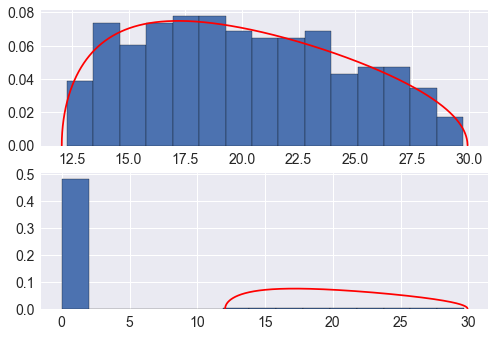

In [46]:
plt.subplot(211)
phist(complete_evals[-199:])
plt.plot(l,density, 'r')
plt.subplot(212)
phist(complete_evals_2)
plt.plot(l,density, 'r')

# Dynamics with accounting

In [62]:
M = 100
xi_fic = np.random.normal(loc = 0, scale = 1, size =M)

In [63]:
xi_fic

array([ 0.92760123,  1.60860532,  1.04946201,  0.99437736,  0.32479654,
        1.73637429,  0.32667549, -0.69773658,  1.60602159, -1.17880638,
       -1.98567614, -0.22800744, -0.39722427,  0.37221922, -0.22720118,
        0.95381762, -1.0211996 ,  0.59065522, -1.16204093,  0.15028432,
        0.68320751, -1.21190402, -0.89214801,  0.05903844,  2.25934785,
       -0.84080792,  0.63792646,  0.43679578,  0.00743238, -1.08842435,
       -1.18988227,  0.49343612, -2.57832693,  0.525896  ,  0.54310245,
        1.45488397,  0.47837655, -0.38817363, -0.67292276,  0.96108561,
       -1.19708944,  0.0948199 ,  1.64938497, -1.3526546 , -0.20790594,
       -0.21111102,  0.22258488, -0.71232456,  1.16485237, -0.18407009,
        0.45267737, -0.09326773,  0.57727424,  2.05233368, -0.9509094 ,
       -1.510581  , -0.23441555, -1.50658608,  0.53461351,  0.3812844 ,
       -1.33049237,  0.05911625, -1.09116189, -0.59055273,  2.00995894,
       -0.48911485, -1.27691207, -0.34967097, -0.82419494, -1.20

In [64]:
demand = 0.0
supply = 0.0
for xi in xi_fic:
    if xi >0:
        supply += xi
    else:
        demand += xi

In [65]:
print supply, demand

35.090493237136215 -48.4957651884231


In [66]:
demand = np.abs(demand)

In [68]:
xi_copy = np.copy(xi_fic)
print demand, supply
factor = 0.0
if supply> demand:
    print "Supply greater than demand"
    factor = demand/supply
if demand > supply:
    print "Demand greater than supply"
    factor = supply/demand
print "Sum of xi matrix", np.sum(xi_fic)

48.4957651884231 35.090493237136215
Demand greater than supply
Sum of xi matrix -13.405271951286892


In [69]:
for i in range(len(xi_fic)):
    if supply > demand:
        print "Supply greater than demand"
        if xi_fic[i] >0 :
            xi_fic[i] = xi_fic[i]*factor
    if demand > supply:
        print "Demand greater than supply"
        if xi_fic[i] < 0:
            xi_fic[i] = xi_fic[i]*factor

Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
Demand greater than supply
D

In [70]:
print np.sum(xi_fic)

-9.103828801926284e-15


In [48]:
print xi_fic
print xi_copy

[-0.99150724  0.25227153 -0.6279059  -0.93009893 -0.43613915  1.13608867
  0.34261878 -1.23850506  2.15540675  0.33777054]
[-0.99150724  0.25227153 -0.6279059  -0.93009893 -0.43613915  1.13608867
  0.34261878 -1.23850506  2.15540675  0.33777054]


In [71]:
for i in range(len(xi_copy)):
#     factor = supply/demand
    xi_copy[i] = xi_copy[i]*factor

In [72]:
print np.sum(xi_copy)

-9.699766627476535


In [73]:
demand = 0.0
supply = 0.0
for xi in xi_fic:
    if xi >0:
        supply += xi
    else:
        demand += xi
print demand, supply

-35.090493237136215 35.090493237136215


**Conclusion**: Dont have to touch the people whose needs are being satisfied